# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


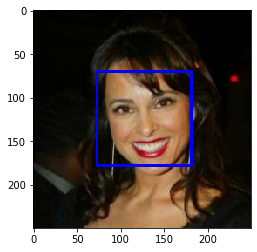

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[250])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

As obtained below, the performance obtained is:
- Human face detection accuracy of 99.00%
- Dog face detection accuracy of 9.00%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
humans_acc = np.mean([face_detector(im) for im in tqdm(human_files_short)])*100
dogs_acc = np.mean([face_detector(im) for im in tqdm(dog_files_short)])*100
print(f'\n\nHuman face detection accuracy of {humans_acc:.2f}%')
print(f'Dog face detection accuracy of {dogs_acc:.2f}%')

100%|██████████| 100/100 [00:15<00:00,  6.34it/s]

Human face detection accuracy of 99.00%
Dog face detection accuracy of 9.00%



We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [7]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

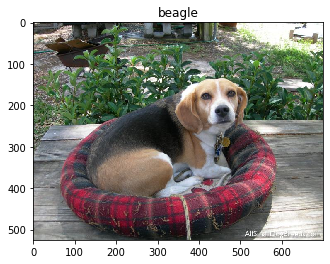

In [11]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_img(img_path):
    ''' 
    Transform input image to a normalized tensor that feeds the VGG16 model
    Args:
        img_path
    Returns:
        Tensor representing the image
    '''
    img = Image.open(img_path).convert('RGB')

    # Using recommended img normalization from pytorch (https://pytorch.org/docs/stable/torchvision/models.html)
    norm_mean = (0.485, 0.456, 0.406)
    norm_std  = (0.229, 0.224, 0.225)
    img_transform = transforms.Compose([
        transforms.Resize(256),
        # transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(norm_mean, norm_std)
    ])
    
    # Grab only first 3 channels and add batch dim
    img = img_transform(img)[:3,:,:].unsqueeze(0)
    return img

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    
    # Pre-process image
    img = load_img(img_path)
    
    # Use GPU if available
    if use_cuda:
        img = img.cuda()
    
    # Run the image through the model and predict its outcome
    prediction = VGG16(img)

    # Get the class index with the highest probability
    prediction_idx = torch.max(prediction, 1)[1].item()

    return prediction_idx # predicted class index

def display_prediction(img_path):
    '''
    Display prediction based on returned index
    Args:
        img_path: path to an image

    Returns:
        Fig with prediction as title
    '''
    # Load ImageNet classes dict (downloaded here https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)
    from Imagenet1000 import Class_index

    # Get prediction label
    title_idx = VGG16_predict(img_path)
    title = Class_index[title_idx]

    # Load original image and convert to RGB
    bgr_img = cv2.imread(img_path)
    img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

    # Plot results
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title(title)
    plt.show()


# Let's test our functions
rand = np.random.randint(0, high=len(dog_files)-1, size=1)[0]
display_prediction(dog_files[rand])

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):

    # Get prediction index
    idx = VGG16_predict(img_path)
    if (151 <= idx <= 268):
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

- Percentage of dogs detected in human files: 2.00%
- Percentage of dogs detected in dog files: 98.00%

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_set_acc = np.mean([dog_detector(im) for im in tqdm(human_files_short)])*100
dog_set_acc = np.mean([dog_detector(im) for im in tqdm(dog_files_short)])*100
print(f'\n\nPercentage of dogs detected in human files: {human_set_acc:.2f}%')
print(f'Percentage of dogs detected in dog files: {dog_set_acc:.2f}%')

100%|██████████| 100/100 [00:06<00:00, 14.92it/s]

Percentage of dogs detected in human files: 2.00%
Percentage of dogs detected in dog files: 98.00%



We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [14]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
data_path = './dogImages'


# I decided to use Augmentation in cover a wider sample scenario
norm_mean = (0.485, 0.456, 0.406)
norm_std  = (0.229, 0.224, 0.225)

transform_dict = {
    'train': transforms.Compose([
                transforms.Resize(256),
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(5),
                transforms.RandomResizedCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(norm_mean, norm_std)
                ]),

    'valid_test': transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(norm_mean, norm_std)
                    ]),
}


# Load training, test and validation datasets
train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform=transform_dict['train'])
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform=transform_dict['valid_test'])
validation_data = datasets.ImageFolder(os.path.join(data_path, 'valid'), transform=transform_dict['valid_test'])

# Prepare datasets
loaders_scratch = {
    'train': torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size,
                                           shuffle=True),
    'test': torch.utils.data.DataLoader(test_data, 
                                           batch_size=batch_size),
    'valid': torch.utils.data.DataLoader(validation_data, 
                                                batch_size=batch_size)
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- I chose to resize images to 256px and then use a centercrop to obtain 224x224 images, which should be best suited for a VGG16 model. I chose to leave default values for the resized and crop aspect ratio
- Yes I augmented the dataset using some of the Random Transformations provided by pytorch, in order to avoid overfitting and to make the network more robust to different input images. Additionally, since we are using a small dataset in general (less than 70 images per class) it is mandatory to introduce augmentation in order to avoid overfitting. I chose to add random horizontal flips, random rotations of up to 5deg and random resized images center cropped at 224x224.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # I chose 3 CNN layers with 2 fully connected MLP
          
        # First 2 CNN will reduce size to half (stride=2) and strech depth to 64 dim
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        # Last CNN layer keeps image size constant (stride=1) and doubles the depth
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # Max Pooling Layer to reduce size to half
        self.pool = nn.MaxPool2d(2, 2)

        # Fully-connected layers
        self.fc1 = nn.Linear(7*7*128, 500)
        self.fc2 = nn.Linear(500, 133)

        # Add Dropout to avoid overfitting
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        ## Fwd pass
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x))) 
        x = self.pool(F.relu(self.conv3(x)))
       
        # Fully connected layers
        _, C, H, W = x.data.size()
        x = x.view(-1, C*H*W) # Flatten tensor
        x = self.dropout(x)
        x = F.relu(self.fc1(x)) # Hidden layer
        x = self.dropout(x)
        x = self.fc2(x) # Last layer without activation function
 
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

- I went for an architecture for the features of **3 CNNs**. The first 2 CNNs use a **stride of 2** and **padding of 1**, which will result in a reduced image dim by half at each layer. This has the advantage of quickly reduce the image size, as well as increase the depth dimension of the tensor. The down side is that it will probably not be a very good network at picking up details and more complex patterns about the image. The first CNN stretches the depth from **3 to 32**, then the second CNN increases its **depth to 64**.

- The third CNN layer maintains the image size (stride=1), while doubling the tensor depth to 128. All CNN layers are using a 3x3 kernel

- After the features sequence, I added **2 fully connected MLP layers**, using a hidden layer that reduces the size of the flatten tensor to 500 and a final fc layer that outputs a final vector length equals to the ammount of classes in the dataset.

- **Relu** activation was used for the hidden layer, no actvation function was used for the final layer.

- A **dropout** layer was added at the classifier sequence in order to reduce overfitting, using p=20%

The final architecture then is shown below:

<b>
Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)) <br>
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1)) <br>
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) <br>
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False) <br>
  (fc1): Linear(in_features=6272, out_features=500, bias=True) <br>
  (fc2): Linear(in_features=500, out_features=133, bias=True) <br>
  (dropout): Dropout(p=0.2, inplace=False) <br>
)
</b>

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.06)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [18]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)

            # Backprop step
            loss.backward()
            optimizer.step()
            train_loss += loss.item()*data.size(0)
            # train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))


        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()*data.size(0)
        
        # Get avg losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print(f'Validation loss has decresed: {valid_loss_min:.6f} --> {valid_loss:.6f}')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss

    # return trained model
    return model


# # train the model
n_epochs = 20
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'scratch_model_final.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('scratch_model_final.pt'))

Epoch: 1 	Training Loss: 4.867157 	Validation Loss: 4.770936
Validation loss has decresed: inf --> 4.770936
Epoch: 2 	Training Loss: 4.714238 	Validation Loss: 4.528978
Validation loss has decresed: 4.770936 --> 4.528978
Epoch: 3 	Training Loss: 4.607647 	Validation Loss: 4.442688
Validation loss has decresed: 4.528978 --> 4.442688
Epoch: 4 	Training Loss: 4.542762 	Validation Loss: 4.364247
Validation loss has decresed: 4.442688 --> 4.364247
Epoch: 5 	Training Loss: 4.470137 	Validation Loss: 4.297512
Validation loss has decresed: 4.364247 --> 4.297512
Epoch: 6 	Training Loss: 4.417899 	Validation Loss: 4.256166
Validation loss has decresed: 4.297512 --> 4.256166
Epoch: 7 	Training Loss: 4.349271 	Validation Loss: 4.126780
Validation loss has decresed: 4.256166 --> 4.126780
Epoch: 8 	Training Loss: 4.295801 	Validation Loss: 4.057030
Validation loss has decresed: 4.126780 --> 4.057030
Epoch: 9 	Training Loss: 4.222687 	Validation Loss: 4.067180
Epoch: 10 	Training Loss: 4.157388 	Vali

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.565465


Test Accuracy: 13% (115/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [23]:
## TODO: Specify data loaders
# Same as in previous step
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [24]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

# In order to apply transfer learning, we will use the pretrained features weights (freeze)
# And train the network to obtain new weights for the fully connected layer 
for param in model_transfer.features.parameters():
    param.requires_grad = False

# Additionally we will modify the last Layer to tailor our particular case study
n_inputs = model_transfer.classifier[6].in_features
end_layer = nn.Linear(n_inputs, 133) # We have 133 classes in our final output
# Replace last layer
model_transfer.classifier[6] = end_layer

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

This is where transfer learning shows its powerful capabilites for any developer that wants to benefit from previous networks trained and customize it to its needs. For this task the VGG16 network was used, but I could've easily picked up Resnet50 or any other available pretrained network. 

Basically here I want to make use of what this network already learned, in terms of pattern/features recognition. That's why I froze the pretrained CNN weights, since they are already tuned to find features in images.

The classifier portion is where we want to train this network, changing only the very last FC layer to fit our desired application class output (133 dog breeds).

This approach is definitely suitable for this application, since VGG16 was trained using the ImageNet dataset, so it already knows how to recognize critical features that will be used to recognize the dogs in the images, and by training on the classifiers it will be able to infere the dogs breed.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [25]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.005)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [26]:
# train the model
n_epochs = 20
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.521667 	Validation Loss: 0.700684
Validation loss has decresed: inf --> 0.700684
Epoch: 2 	Training Loss: 1.281258 	Validation Loss: 0.520033
Validation loss has decresed: 0.700684 --> 0.520033
Epoch: 3 	Training Loss: 1.100438 	Validation Loss: 0.500925
Validation loss has decresed: 0.520033 --> 0.500925
Epoch: 4 	Training Loss: 1.011919 	Validation Loss: 0.416496
Validation loss has decresed: 0.500925 --> 0.416496
Epoch: 5 	Training Loss: 0.966045 	Validation Loss: 0.422126
Epoch: 6 	Training Loss: 0.942645 	Validation Loss: 0.423016
Epoch: 7 	Training Loss: 0.908654 	Validation Loss: 0.383424
Validation loss has decresed: 0.416496 --> 0.383424
Epoch: 8 	Training Loss: 0.852445 	Validation Loss: 0.401029
Epoch: 9 	Training Loss: 0.848596 	Validation Loss: 0.394341
Epoch: 10 	Training Loss: 0.823006 	Validation Loss: 0.367786
Validation loss has decresed: 0.383424 --> 0.367786
Epoch: 11 	Training Loss: 0.809336 	Validation Loss: 0.402883
Epoch: 12 	Training 

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [27]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.399030


Test Accuracy: 87% (730/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [28]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    # Pre-process image (reuse previous function)
    img = load_img(img_path)
    
    # Use GPU if available
    if use_cuda:
        img = img.cuda()
    
    # Run the image through the model and predict its outcome
    prediction = model_transfer(img)

    # Get the class index with the highest probability
    prediction_idx = torch.max(prediction, 1)[1].item()

    return class_names[prediction_idx] # predicted class index

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [29]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    image = Image.open(img_path)
    plt.imshow(image)
    prediction = predict_breed_transfer(img_path)
    
    if dog_detector(img_path):
        obj = 'Dog'
    elif face_detector(img_path):
        obj = 'Human'
    else:
        print(f'\n\t Sorry, I couldn\'t identify you!')
        plt.show()
        return

    print(f'\n\tHey, {obj}!')
    plt.show()
    print(f'You look like a {prediction}!')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output is surprisingly more accurate than I expected :) 

I believe that the network can be improved by taking several actions, that unfortunately due to time constraints I was unable to explore:

1. Perform sensitivity analysis on the hyperparameters in order to achieve a better tuning.
2. Investigate different weight initialization methods (kaiming initialization)
3. Try out different pretrained CNNs. Recent winners of ILSVRC should definitely be a place to start
4. The best way to improve accuracy will always go along the way with a much larger dataset.




	Hey, Human!


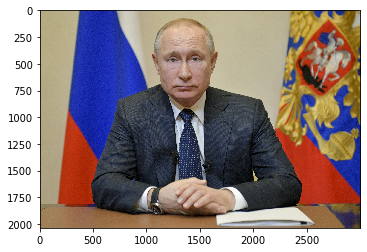

You look like a Brussels griffon!

	Hey, Human!


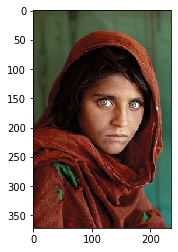

You look like a Dogue de bordeaux!

	Hey, Dog!


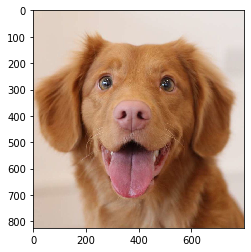

You look like a Nova scotia duck tolling retriever!

	Hey, Dog!


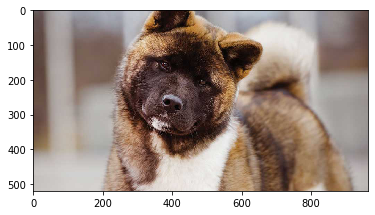

You look like a Akita!

	 Sorry, I couldn't identify you!


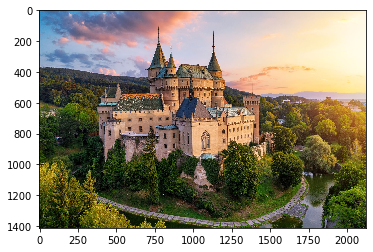


	Hey, Dog!


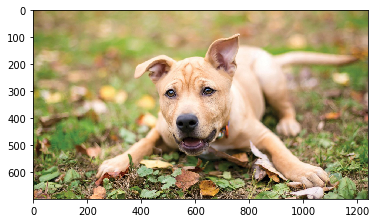

You look like a American staffordshire terrier!


In [32]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
my_humans = './test_images/'
for f in os.listdir(my_humans):
# for f in np.hstack((human_files[:3])):
    run_app(os.path.join(my_humans,f))
